In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from collections import Counter
import seaborn as sns
sns.set(rc={'figure.figsize':(10,20)})
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [3]:
"""Designate csv files to use
    Configure the gmaps API key for mapping
"""
review_csv = 'yelp_academic_dataset_review.csv'
business_csv = 'yelp_academic_dataset_business.csv'
user_csv = 'yelp_academic_dataset_user.csv'

#gmaps.configure(api_key=(This is now in a sticky on my desktop, will give access when needed))

In [4]:
#Set business dataframe using set columns
#Set list of columns to use for the business dataframe to reduce size and load"

business_list=['business_id','name','is_open','stars','review_count','city','state','postal_code','latitude','longitude','categories']

business_df = pd.read_csv(business_csv , usecols=business_list)
business_df.dropna()

#remove closed businesses, 1 for open 0 for closed
business_df = business_df[business_df['is_open']==1]
business_df['is_open'].unique()
business_df = business_df.drop(columns=['is_open'])
#business_df = business_df[business_df['categories'].str.contains(food_list ,case=False, na=False)]

In [5]:
# Finds outliers in the dataset.  We don't want states that have fewer than 1000 reviews
# Also we only want states of the US so Canadian provinces are out
business_df.groupby('state')['review_count'].count()

state
AB      7038
AL         3
AZ     49415
BC         2
CA        21
CO         2
CT         1
DOW        1
DUR        1
FL         2
GA         3
HI         1
HPL        1
IL      1593
MB         1
MI         2
MO         1
NC     13433
NE         2
NV     31180
NY        22
OH     13762
ON     28433
OR         1
PA     10206
QC      8215
SC      1113
TX         5
UT         2
VA         1
VT         2
WA         4
WI      4433
YT         1
Name: review_count, dtype: int64

In [6]:
#Designate states to keep and reset the DF
states = ['AZ','IL','NC','NV','OH','PA','SC','WI']
business_df = business_df[business_df['state'].isin(states)]

In [7]:
# Create a data frame to examine what the average rating is per state, as well as rate of reviews
# this can show us which states have highest user activity or interest
business_means_df = business_df.groupby('state', as_index = False)['stars'].mean()
business_means_df.sort_values('stars')

#We can see that AZ has the highest average rating, with Illinois having the lowest

,state,stars
1,IL,3.422159
4,OH,3.479182
6,SC,3.497754
2,NC,3.508673
5,PA,3.566481
7,WI,3.607828
3,NV,3.682842
0,AZ,3.689042


'\nThis cell shows us the general breakdown of reviewed restaurants. \nWe see the general weight is below 1000 of reviews, with outliers reaching steadily in rhe 3000-4000 range.\nWe will make a cut off at 1000 to create a cleaner visualization. \n\nWe also want well vetted businesses, so we are going to look at businesses with 50 or more reviews.  '

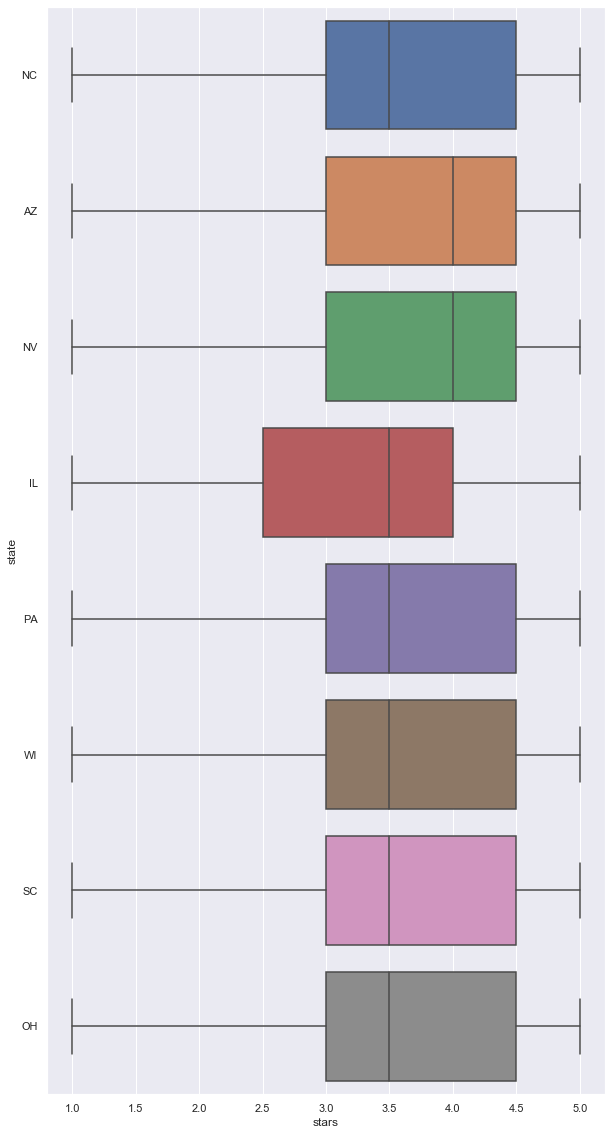

In [33]:
sns.boxplot('stars','state',data=business_df, orient='h')
#sns.swarmplot('stars','state',data=business_df)

"""
This cell shows us the general breakdown of reviewed restaurants. 
We see the general weight is below 1000 of reviews, with outliers reaching steadily in rhe 3000-4000 range.
We will make a cut off at 1000 to create a cleaner visualization. 

We also want well vetted businesses, so we are going to look at businesses with 50 or more reviews.  """

In [9]:
NV_df = business_df[business_df['state']=='NV']

"""
AZ_df = business_df[business_df['state']=='AZ']
IL_df = business_df[business_df['state']=='IL']
NC_df = business_df[business_df['state']=='NC']
NV_df = business_df[business_df['state']=='NV']
OH_df = business_df[business_df['state']=='OH']
PA_df = business_df[business_df['state']=='PA']
SC_df = business_df[business_df['state']=='SC']
WI_df = business_df[business_df['state']=='WI']

These were made to easily jump in and start viewing information per state
"""

"\nIL_df = business_df[business_df['state']=='IL']\nNC_df = business_df[business_df['state']=='NC']\nNV_df = business_df[business_df['state']=='NV']\nOH_df = business_df[business_df['state']=='OH']\nPA_df = business_df[business_df['state']=='PA']\nSC_df = business_df[business_df['state']=='SC']\nWI_df = business_df[business_df['state']=='WI']\n\nThese were made to easily jump in and start viewing information per state\n"

In [35]:
NV_df.head()
#sns.boxplot('stars','city',data=NV_df, orient='h')

,name,stars,latitude,city,state,review_count,postal_code,categories,business_id,longitude
6,Green World Cleaners,3.5,36.063977,Las Vegas,NV,81,89118,"Dry Cleaning & Laundry, Local Services, Laundr...",oiAlXZPIFm2nBCt0DHLu_Q,-115.241463
142,Hot Tub Liquidators,4.5,36.036703,Henderson,NV,69,89014,"Home & Garden, Shopping, Hot Tub & Pool",HZ2Kn4iKeKZXjLQSFfAatw,-115.029929
157,Fat Moe's Pizza & Wings,4.0,36.099361,Las Vegas,NV,141,89103,"Pizza, Salad, Burgers, Restaurants",Yr_w9lakJrKMyEG_hI6zbA,-115.226636
211,103 Hot Pilates & Yoga,4.5,36.112381,Las Vegas,NV,81,89147,"Yoga, Pilates, Active Life, Fitness & Instruct...",4jIwNa8twpfqvsHuWBphZw,-115.306631
224,Southwest Medical Associates at Siena,2.5,36.003453,Henderson,NV,135,89052,"Doctors, Medical Centers, Health & Medical, Ur...",G1t8_G105yWDTPiWe1oEQw,-115.113011


In [11]:
NV_df = NV_df[NV_df['review_count']>50]
NV_best = NV_df[NV_df['stars']==5]
NV_worst = NV_df[NV_df['stars']==1]

In [12]:
AZ_df = business_df[business_df['state']=='AZ']

AZ_df = AZ_df[AZ_df['review_count']>50]
AZ_loc = AZ_df[['latitude','longitude']]
AZ_stars = AZ_df['stars']

AZ_best = AZ_df[AZ_df['stars']==5]
AZ_best_loc = AZ_best[['latitude','longitude']]
AZ_best_reviews =AZ_best['review_count']
best_layer = gmaps.heatmap_layer(AZ_best_loc, weights=AZ_best_reviews)
best_layer.max_intensity =85
best_layer.point_radius = 5

AZ_worst = AZ_df[AZ_df['stars']==1]
AZ_worst_loc = AZ_worst[['latitude','longitude']]
AZ_worst_reviews =AZ_worst['review_count']
worst_layer = gmaps.heatmap_layer(AZ_worst_loc, weights=AZ_worst_reviews)
worst_layer.max_intensity = 10
worst_layer.point_radius = 8
worst_layer.gradient = ['white','blue']

AZ_fig = gmaps.figure()
AZ_fig.add_layer(worst_layer)
AZ_fig.add_layer(best_layer)

best_point = gmaps.symbol_layer(AZ_best_loc,
                                fill_color = 'black',
                                stroke_color='rgba(0, 150, 0, 0.4)', scale=2)
worst_point = gmaps.symbol_layer(AZ_worst_loc,
                                 fill_color='yellow',
                                 stroke_color='rgba(200, 0, 0, 0.4)', scale=4
)

point_fig = gmaps.figure()
point_fig.add_layer(best_point)
point_fig.add_layer(worst_point)

point_fig



Figure(layout=FigureLayout(height='420px'))

In [13]:
NV_loc =NV_df[['latitude','longitude']]
NV_reviews =NV_df['stars']

NV_fig = gmaps.figure()
NV_fig.add_layer(gmaps.heatmap_layer(NV_loc, weights=NV_reviews))

NV_fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
NV_worst_loc = NV_worst[['latitude','longitude']]
NV_worst_reviews =NV_worst['review_count']
worst_layer = gmaps.heatmap_layer(NV_worst_loc, weights=NV_worst_reviews)
worst_layer.max_intensity = 10
worst_layer.point_radius = 8
worst_layer.gradient = ['white','blue']

NV_best_loc = NV_best[['latitude','longitude']]
NV_best_reviews =NV_best['review_count']
best_layer = gmaps.heatmap_layer(NV_best_loc, weights=NV_best_reviews)
best_layer.max_intensity =85
best_layer.point_radius = 5



NV_fig = gmaps.figure()
NV_fig.add_layer(worst_layer)
NV_fig.add_layer(best_layer)

NV_fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
best_point = gmaps.symbol_layer(NV_best_loc,
                                fill_color = 'black',
                                stroke_color='rgba(0, 150, 0, 0.4)', scale=2)
worst_point = gmaps.symbol_layer(NV_worst_loc,
                                 fill_color='yellow',
                                 stroke_color='rgba(200, 0, 0, 0.4)', scale=4
)

point_fig = gmaps.figure()
point_fig.add_layer(best_point)
point_fig.add_layer(worst_point)

point_fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
#Set the reviews dataframe and print head
review_cols = ['stars','business_id','user_id','text','date']
review_df = pd.read_csv(review_csv, usecols=review_cols)

review_df['date'] = pd.to_datetime(review_df['date'])
review_df['date'] = review_df['date'].dt.year

#review_df['text'].apply(lambda x: [item for item in x if item not in stop])
review_df.dropna()
review_df

,stars,user_id,text,business_id,date
0,2.0,OwjRMXRC0KyPrIlcjaXeFQ,"As someone who has worked with many museums, I...",-MhfebM0QIsKt87iDN-FNw,2015
1,1.0,nIJD_7ZXHq-FX8byPMOkMQ,I am actually horrified this place is still in...,lbrU8StCq3yDfr-QMnGrmQ,2013
2,5.0,V34qejxNsCbcgD8C0HVk-Q,I love Deagan's. I do. I really do. The atmosp...,HQl28KMwrEKHqhFrrDqVNQ,2015
3,1.0,ofKDkJKXSKZXu5xJNGiiBQ,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",5JxlZaqCnk1MnbgRirs40Q,2011
4,4.0,UgMW8bLE0QMJDCkQ1Ax5Mg,"Oh happy day, finally have a Canes near my cas...",IS4cv902ykd8wj1TR0N3-A,2017
...,...,...,...,...,...
8021117,1.0,6DMFD3BRp-MVzDQelRx5UQ,"Fricken unbelievable, I ordered 2 space heater...",XW2kaXdahICaJ27A0dhGHg,2019
8021118,3.0,_g6P8H3-qfbz1FxbffS68g,Solid American food with a southern comfort fl...,IsoLzudHC50oJLiEWpwV-w,2019
8021119,5.0,Scmyz7MK4TbXXYcaLZxIxQ,I'm honestly not sure how I have never been to...,kDCyqlYcstqnoqnfBRS5Og,2019
8021120,3.0,lBuAACBEThaQHQGMzAlKpg,Food was decent but I will say the service too...,VKVDDHKtsdrnigeIf9S8RA,2018


In [17]:
best = business_df[business_df['stars']==5]
best.sort_values(by ='review_count').tail(1)
# Our best reviewed business

,name,stars,latitude,city,state,review_count,postal_code,categories,business_id,longitude
141155,Little Miss BBQ,5.0,33.421714,Phoenix,AZ,2329,85034,"Barbeque, Restaurants",Xg5qEQiB-7L6kGJ5F4K3bQ,-111.989161


In [18]:
worst = business_df[business_df['stars']==1]
worst.sort_values(by = 'review_count').tail(1)
# our worst reviewed business

,name,stars,latitude,city,state,review_count,postal_code,categories,business_id,longitude
175659,Cox Communications,1.0,33.678238,Phoenix,AZ,1008,85027,"Internet Service Providers, Home Services, Pro...",7MNBIoGznDHhC1AfxGWOFw,-112.101291


In [19]:
best_reviewed = review_df[review_df['business_id']=='Xg5qEQiB-7L6kGJ5F4K3bQ']
worst_reviewed = review_df[review_df['business_id']=='7MNBIoGznDHhC1AfxGWOFw']
#worst_reviewed = ['text'].apply(lambda x: [item for item in x if item not in stop])

In [20]:
#This step was VERY confusing, but once I understood the order it all clicked
# Needing to create a DF unique to the words needed for the cloud, and 
# removing all stop words

best_text = best_reviewed['text']
best_text = pd.DataFrame(best_text)
best_text['text'] = best_text['text'].astype('string')
best_text['text'] = best_text['text'].str.lower()
best_text['text'] = best_text['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

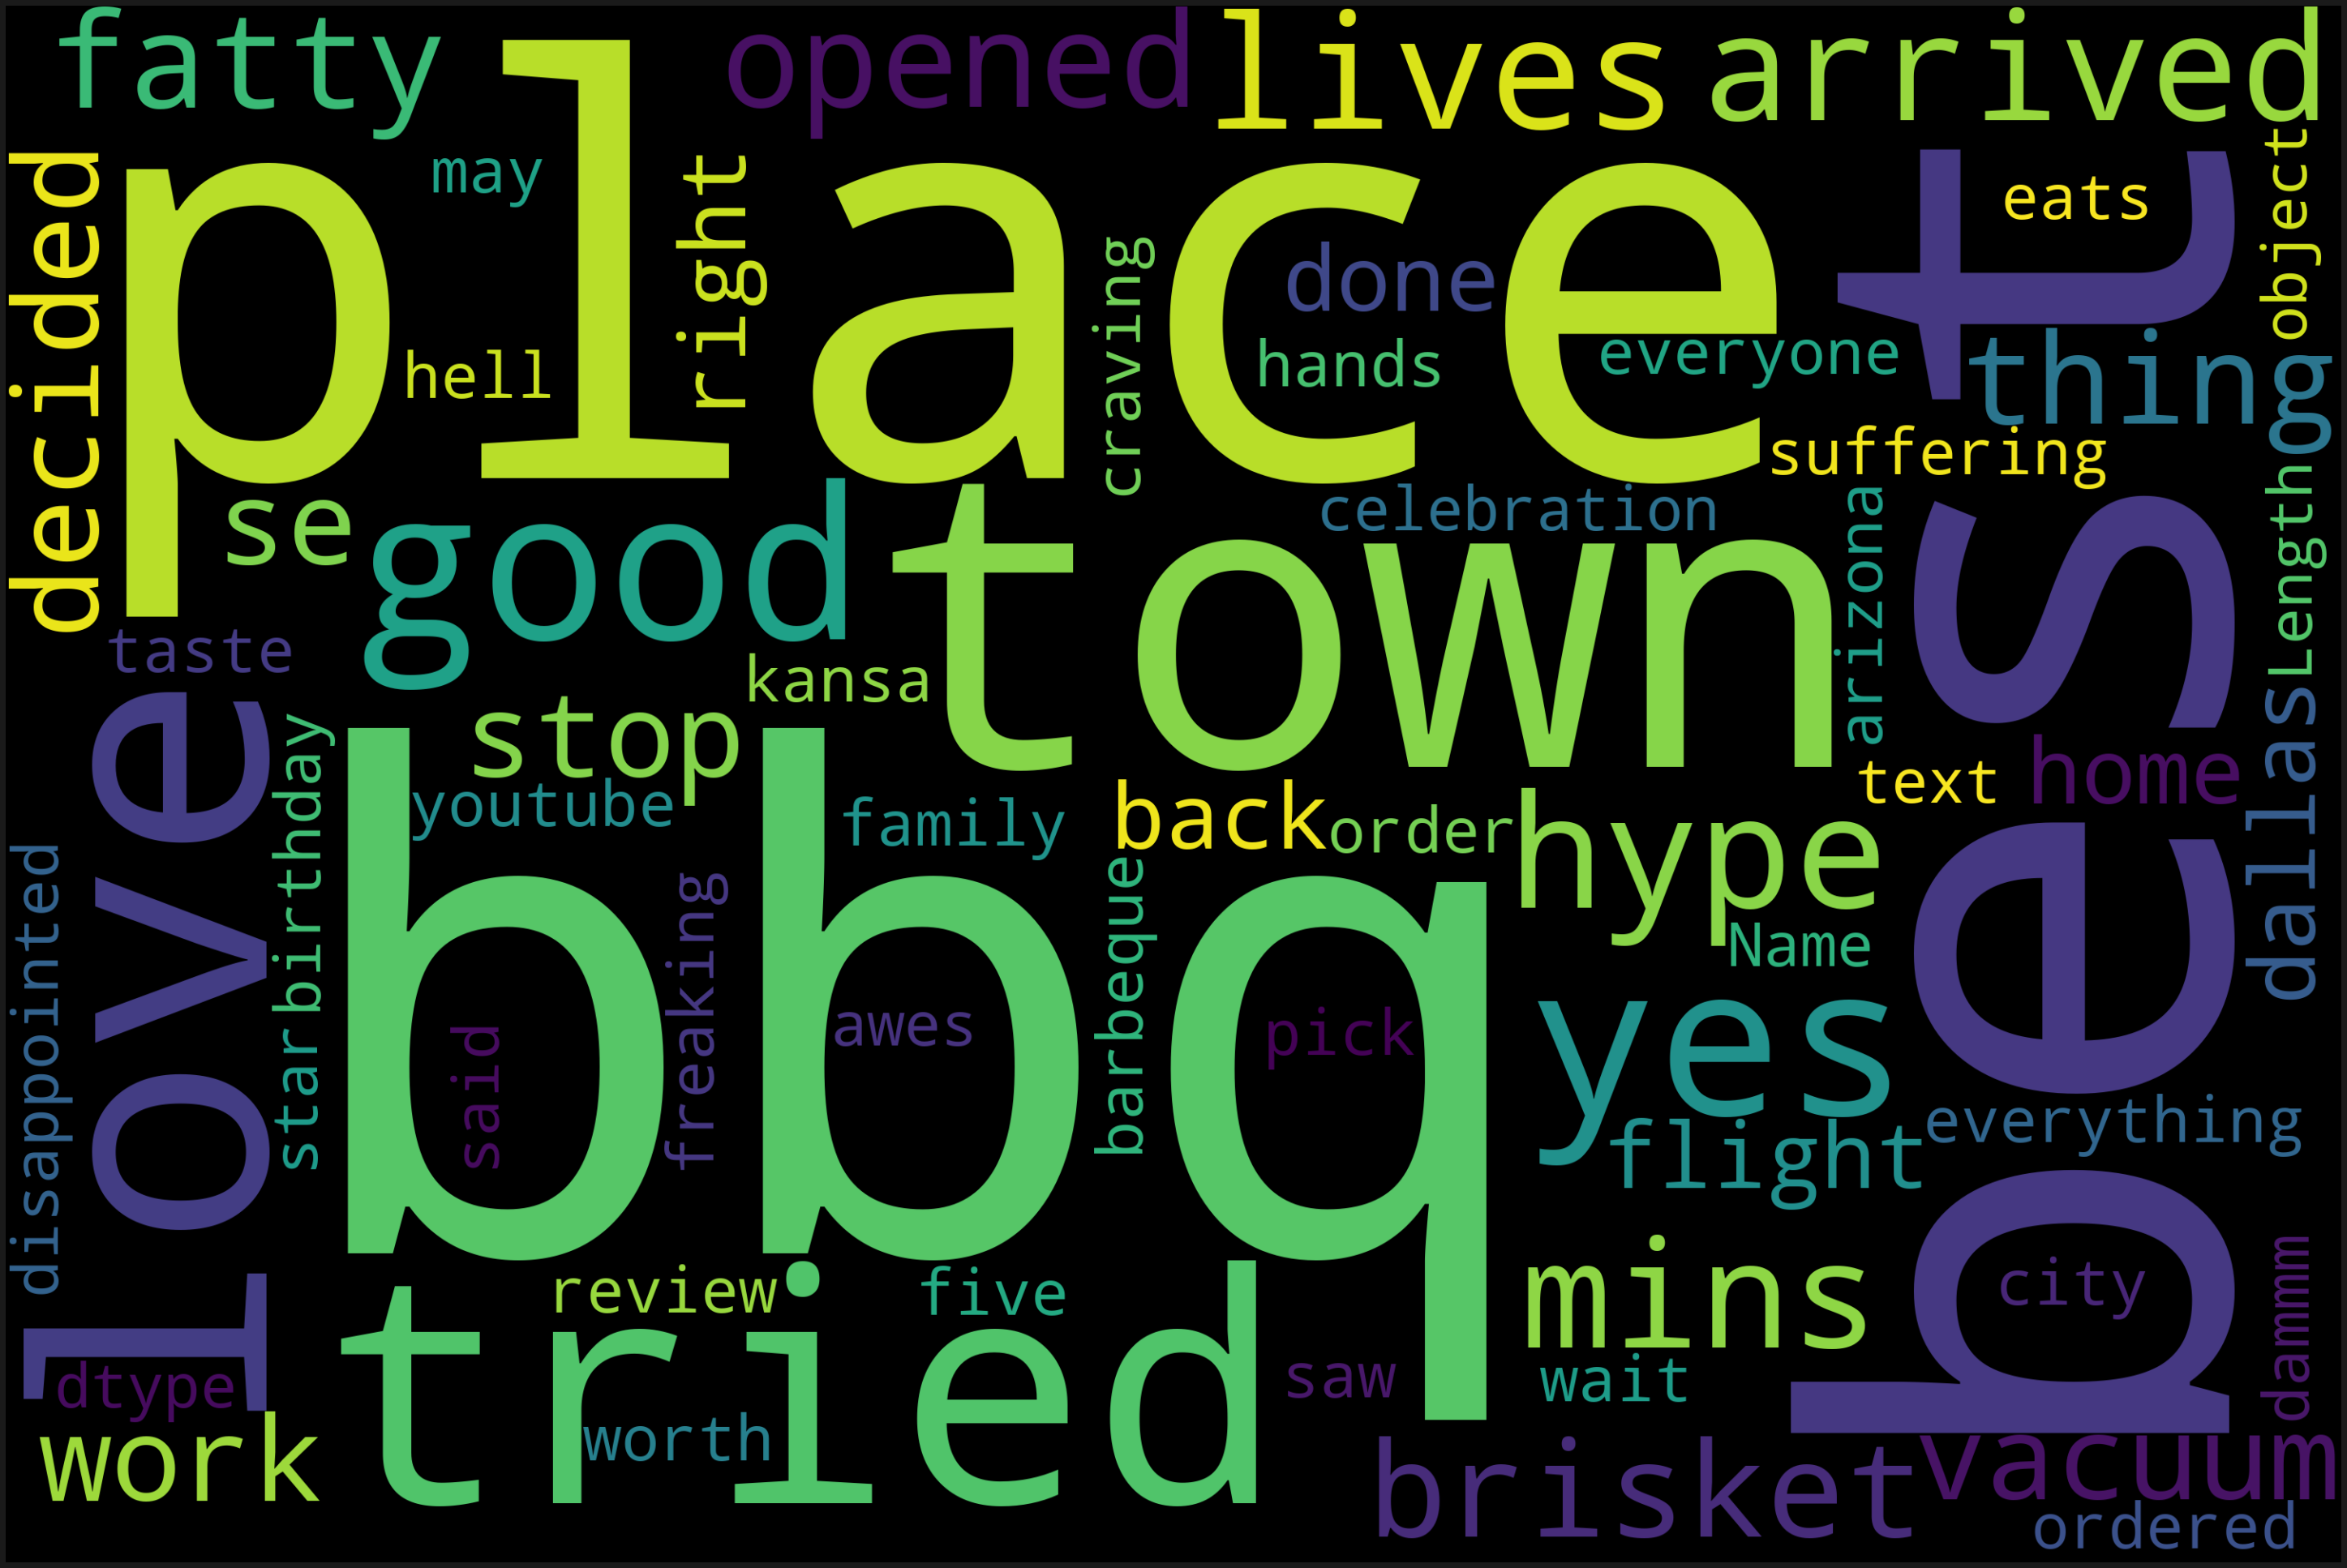

In [21]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(best_text['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0.5, 1.0, 'Most common words for best reviews')

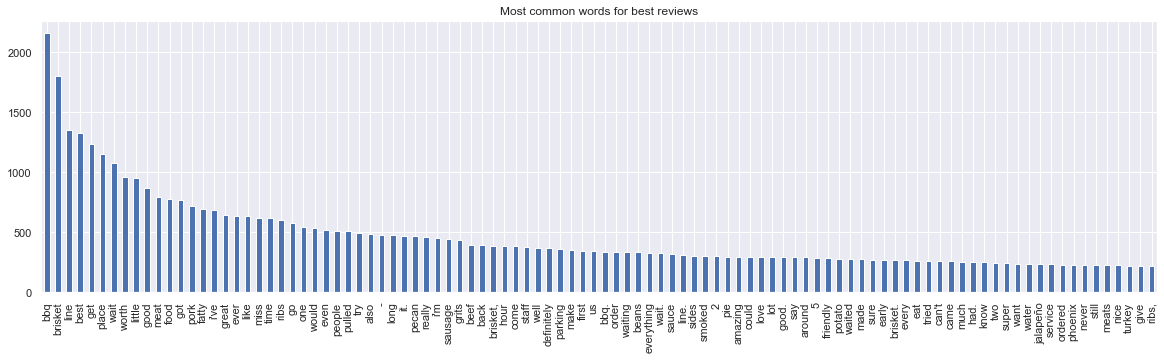

In [22]:
best_text = pd.Series(' '.join(best_text['text']).split()).value_counts()[:100]
best_text.plot.bar(x=[0], y=[1], figsize =(20, 5)).set_title("Most common words for best reviews") 

In [23]:
worst_text = worst_reviewed['text']
worst_text = pd.DataFrame(worst_text)
worst_text['text'] = worst_text['text'].astype('string')
worst_text['text'] = worst_text['text'].str.lower()
worst_text['text'] = worst_text['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


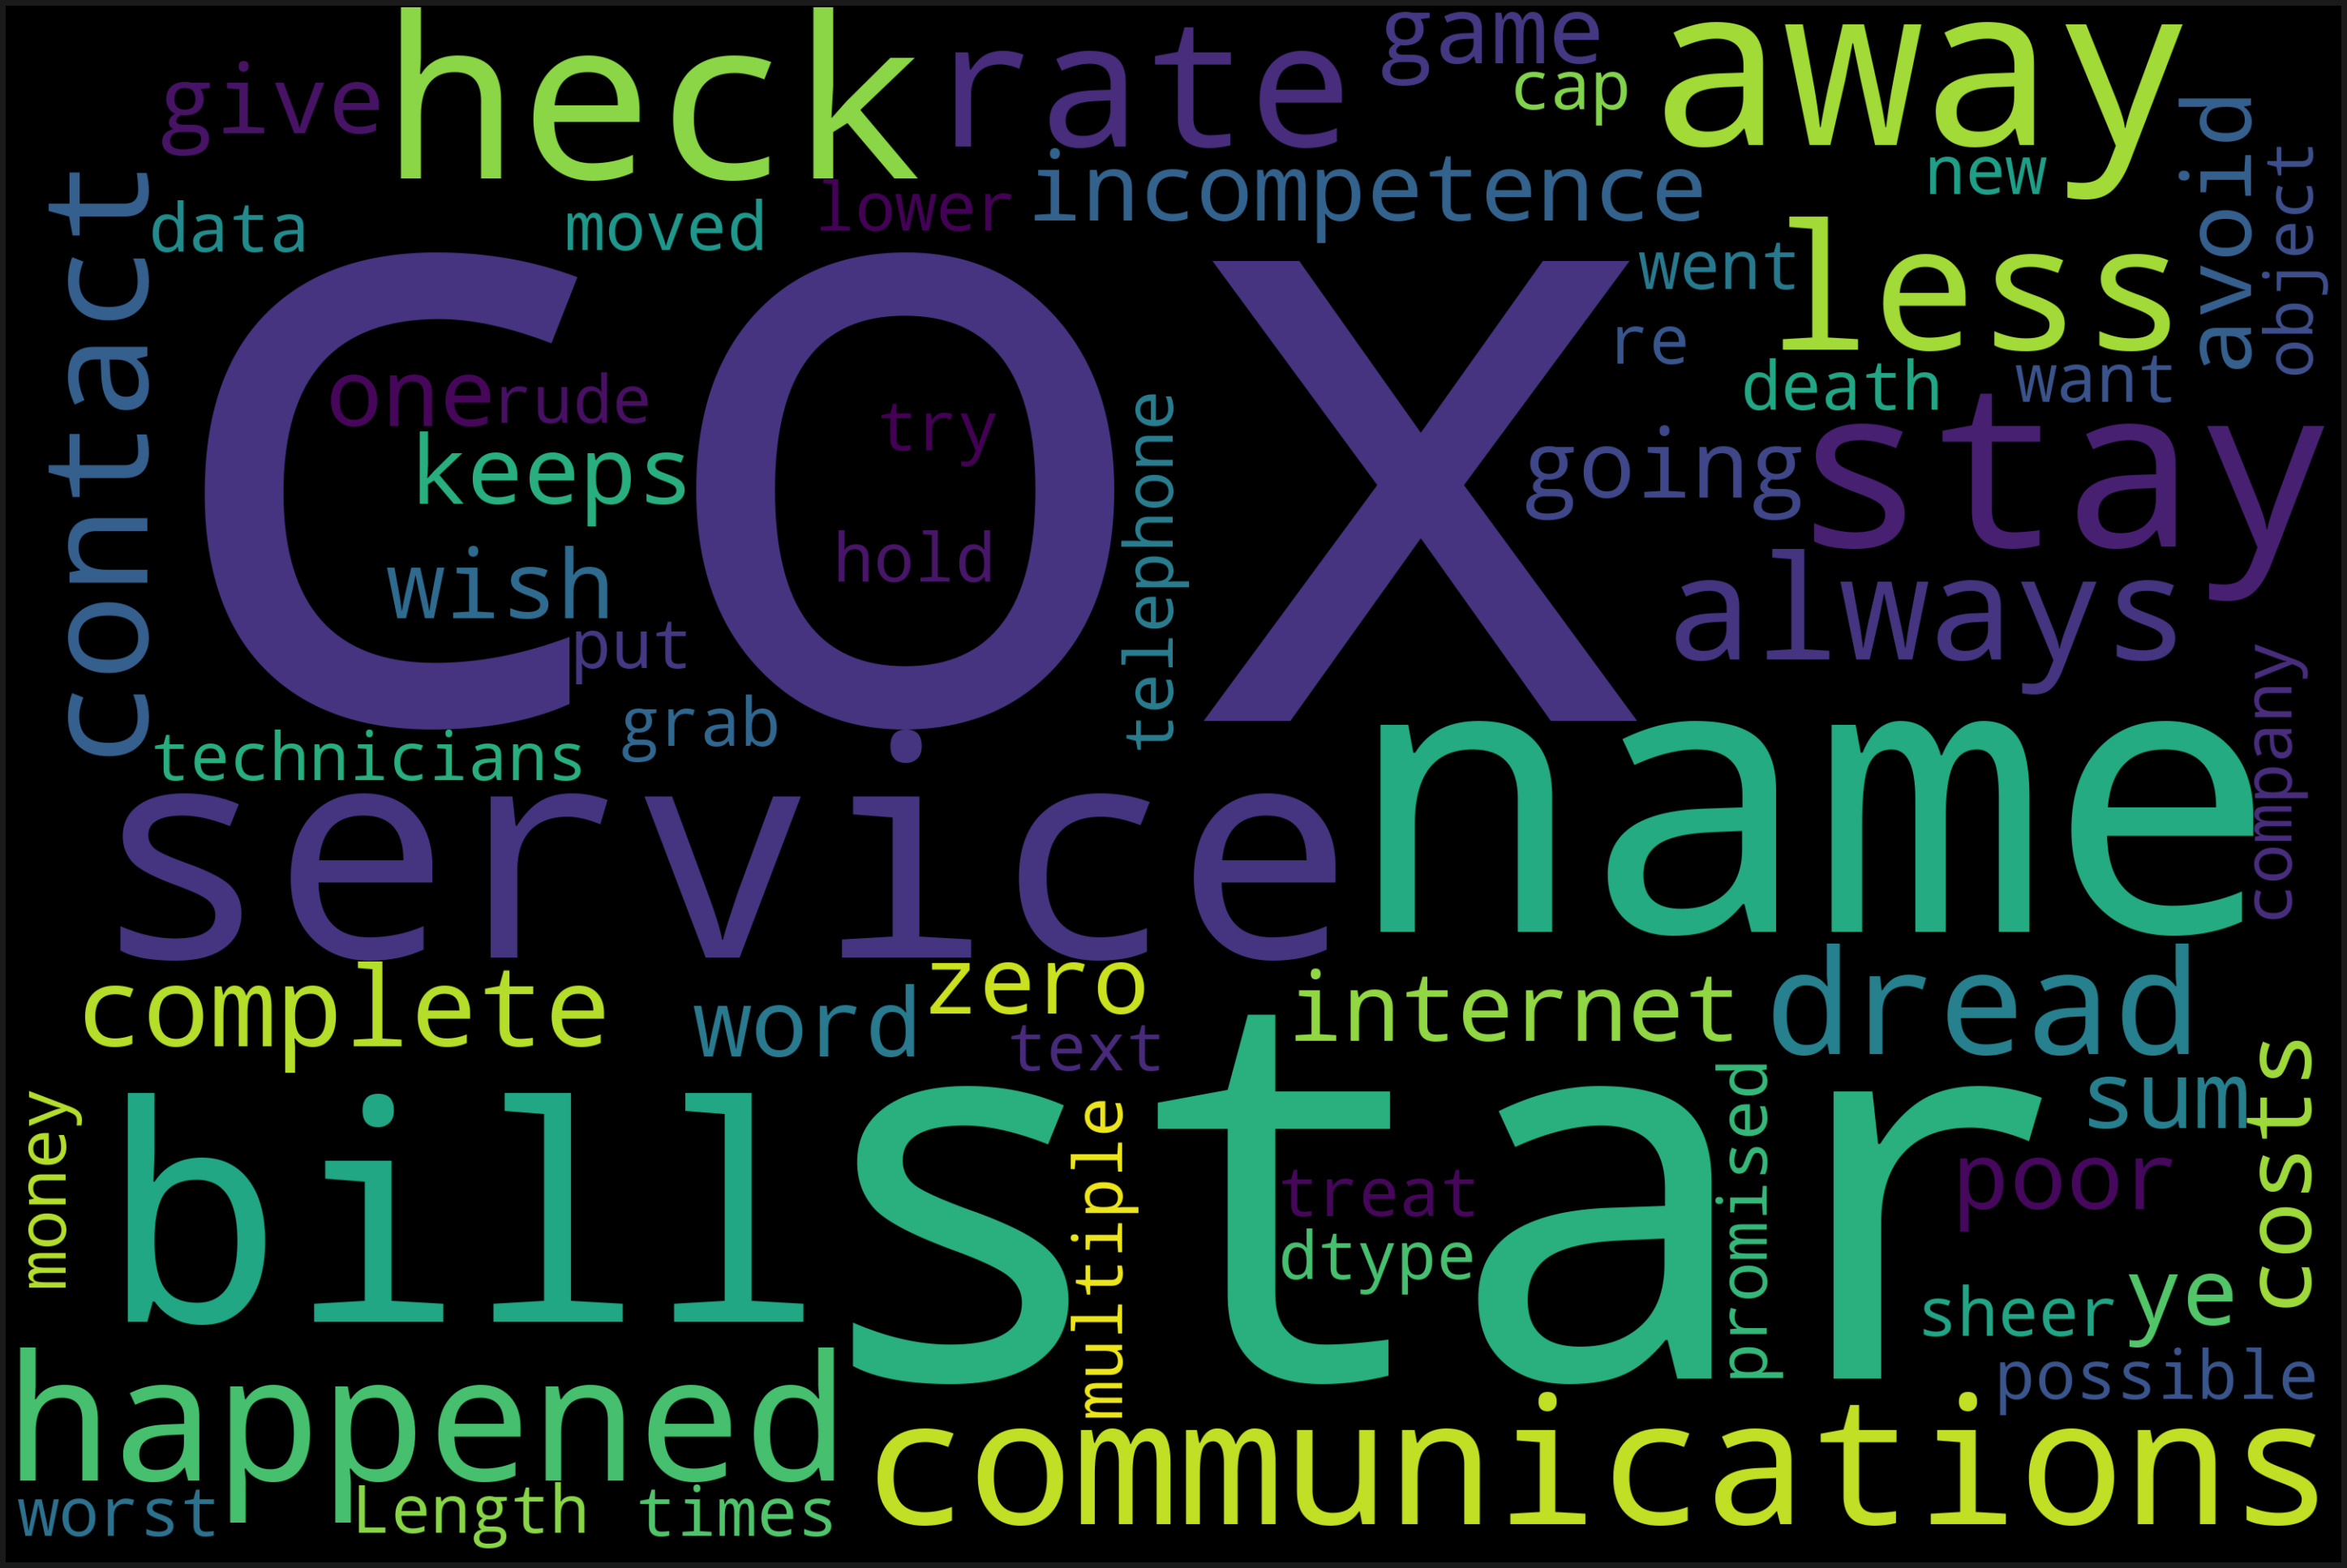

In [24]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(worst_text['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0.5, 1.0, 'Most common words for worst reviews')

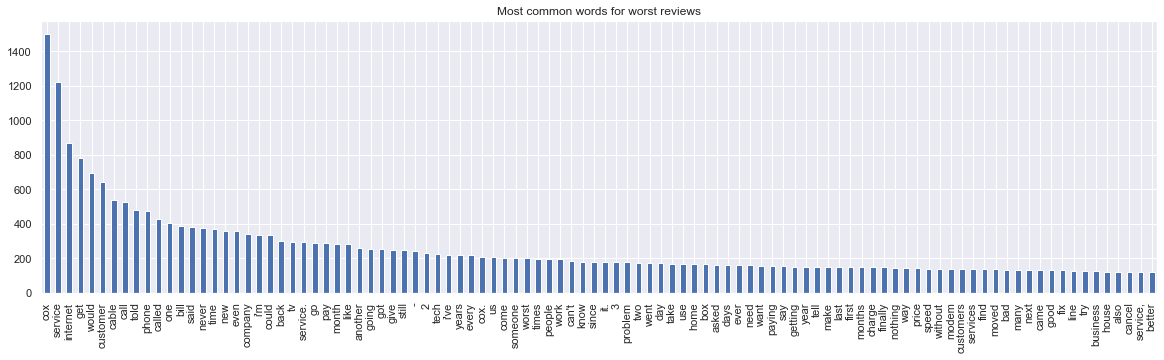

In [25]:
worst_text = pd.Series(' '.join(worst_text['text']).split()).value_counts()[:100]
worst_text.plot.bar(x=[0], y=[1], figsize =(20, 5)).set_title("Most common words for worst reviews") 

The following cells were an attempt to look at user data by year
I did not get to use the methods I wished, but I left them here as a monument of my efforts

In [26]:
user_col = ['review_count','user_id','useful','funny','yelping_since']
user_df = pd.read_csv(user_csv, usecols=user_col)

In [27]:
#Clean user_df by getting rid of users with few reviews
user_df = user_df[user_df['review_count']>100]
user_df = user_df[user_df['review_count']<1000]

#Clean yelping_since by dropping all but the year
user_df['yelping_since']=pd.to_datetime(user_df['yelping_since'])
user_df['yelping_since']= user_df['yelping_since'].dt.year

In [28]:
user_years = user_df.groupby('yelping_since', as_index=False).sum()
user_years

,yelping_since,review_count,useful,funny
0,2004,5121,8772,3265
1,2005,144968,301151,196419
2,2006,664824,1565303,874511
3,2007,1483625,3704419,2061895
4,2008,2147022,5111060,2668705
5,2009,2613334,6151158,2966985
6,2010,2988149,6854887,3150493
7,2011,2924342,6354185,2735757
8,2012,2047125,4454260,1881699
9,2013,1569876,3268139,1330710


Text(0.5, 1.0, 'User Review Totals by Longevity')

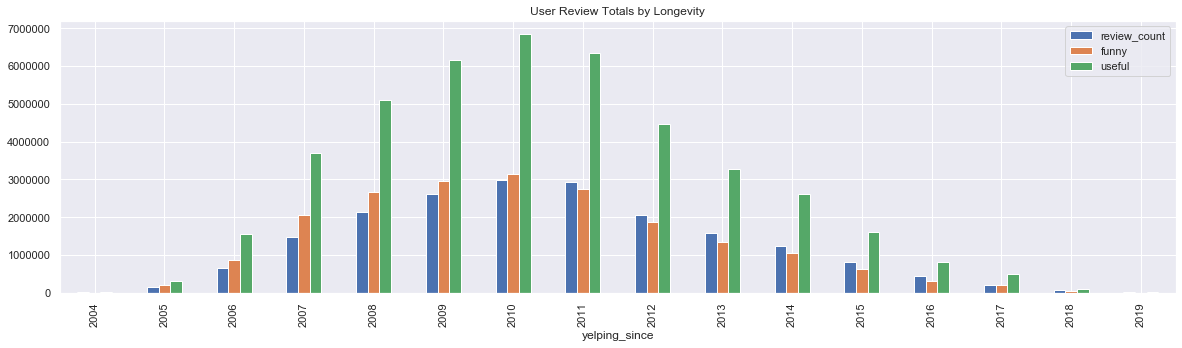

In [30]:
user_years.plot.bar(x='yelping_since', y=['review_count','funny','useful'], figsize =(20, 5)).set_title("User Review Totals by Longevity") 

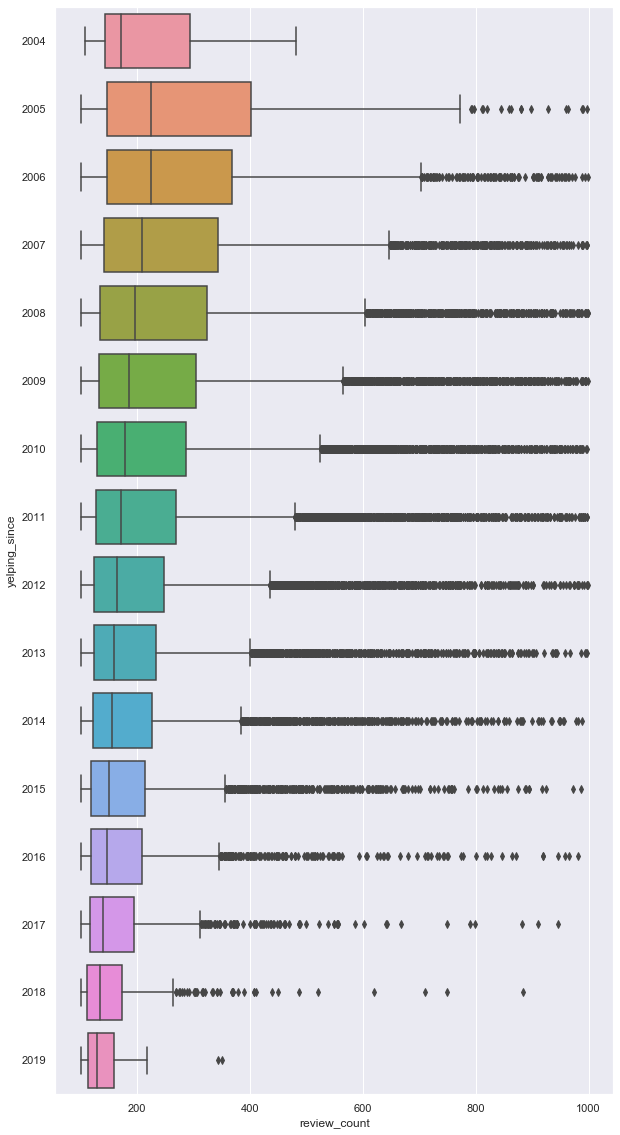

In [31]:
sns.boxplot('review_count','yelping_since', data=user_df, orient='h')